In [2]:
from sympy import *
from __future__ import division

In [3]:
init_printing(use_unicode = False)
init_session(quiet=True)

IPython console for SymPy 1.0 (Python 2.7.12-32-bit) (ground types: python)


In [30]:
#coordinates
t, x, y, z = symbols('t,x,y,z',real = True)

#Euler-Lagrange for the SHO
k, m, V, L_V = symbols('k,m,V,L_V',real=True)

#Rigid body motion
psi, theta, phi = symbols('psi,theta,phi',real=True)

#Quantum box
Psi = symbols('Psi')
L, k1, k3, omega_1, omega_3 = symbols('L,k_1,k_3,omega_1,omega_3',real=True,positive=True)
n1, n3 = symbols('n1,n3',integer=True)

#functions
f,g,h = symbols('f,g,h',cls=Function)

# Trying simple simplifications 

In [5]:
simplify(sin(x)**2 + cos(x)**2)

In [6]:
trigsimp(sin(x)**2+cos(x)**2)

In [7]:
simplify((x**3+x**2-x-1)/(x**2+2*x+1))

In [8]:
simplify(gamma(x)/gamma(x-2))

# Now try collecting terms

In [9]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [10]:
collected_expr = collect(expr,x)

In [11]:
collected_expr

In [12]:
expr.coeff(x,2)

# Differentiation - always fun

In [13]:
expr = exp(x*y*z)
expr

In [14]:
expr.diff(x,y,y,z,z,z,z)

In [15]:
expr.diff(x,1,y,2,z,4)

# Euler-Lagrange Equations for the SHO

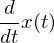

In [16]:
vx = diff(x(t),t)
vx

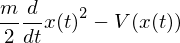

In [17]:
L_V = m*vx**2/2-V(x(t))
L_V

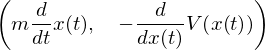

In [18]:
px = diff(L_V,vx)
Gx = diff(L_V,x(t))
px, Gx

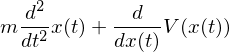

In [19]:
EL = diff(px,t)-Gx
EL

In [20]:
EL_sho = EL.subs({V(x(t)):k/2*x(t)**2}).doit()

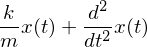

In [21]:
simplify(EL_sho/m)

# Rigid body motion

In [22]:
Mx = Matrix([[1,0,0],[0,cos(psi(t)),sin(psi(t))],[0,-sin(psi(t)),cos(psi(t))]])
My = Matrix([[cos(theta),0,-sin(theta)],[0,1,0],[sin(theta),0,cos(theta)]])
Mz = Matrix([[cos(phi),sin(phi),0],[-sin(phi),cos(phi),0],[0,0,1]])

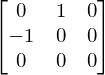

In [23]:
(Mx*My*Mz).diff(phi).subs({phi:0,theta:0,psi(t):0})

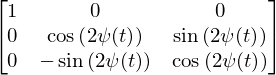

In [24]:
trigsimp(Mx*Mx)

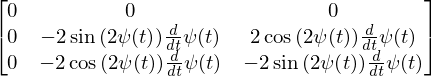

In [25]:
factor(trigsimp(Mx*Mx).diff(t))

# Quantum Mechanics in a Box

In [51]:
k1 = pi/L
k3 = 3*pi/L
hbar  = 4.14e-15
L_box = 200e-9
c     = 3e8
K1    = k1.subs({L:L_box})
K3    = k3.subs({L:L_box})
me    = 0.511e6/c**2
w1    = hbar**2*K1**2/(2.0*me)
w3    = hbar**2*K3**2/(2.0*me)

In [47]:
Psi = sqrt(1/L)*(exp(-I*omega_1*t)*sin(k1*x)+exp(-I*omega_3*t)*sin(k3*x))

In [48]:
Psi_0 = Psi.subs({t:0})

In [49]:
integrate(expand(Psi_0.conjugate()*Psi_0),(x,0,L))

In [53]:
Prob = expand(Psi*Psi.conjugate())

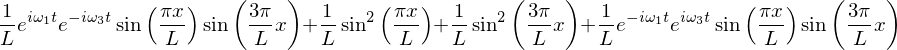

In [54]:
Prob

In [82]:
Prob0 = Prob.subs({L:L_box,k1:K1,k3:K3,omega_1:w1,omega_3:w3,t:0})
Prob1 = Prob.subs({L:L_box,k1:K1,k3:K3,omega_1:w1,omega_3:w3,t:0.1})

In [83]:
print Prob0
print Prob1

5000000.0*sin(5000000.0*pi*x)**2 + 10000000.0*sin(5000000.0*pi*x)*sin(15000000.0*pi*x) + 5000000.0*sin(15000000.0*pi*x)**2
5000000.0*sin(5000000.0*pi*x)**2 + 5000000.0*exp(-3.01871624266145e-5*I*pi**2)*sin(5000000.0*pi*x)*sin(15000000.0*pi*x) + 5000000.0*exp(3.01871624266145e-5*I*pi**2)*sin(5000000.0*pi*x)*sin(15000000.0*pi*x) + 5000000.0*sin(15000000.0*pi*x)**2


In [84]:
print Prob0.subs({x:L_box/3.0}).evalf()
print Prob1.subs({x:L_box/3.0}).evalf()

3750000.00000000
3750000.00000000


In [91]:
x_knots     = np.linspace(0,200e-9,100)
Prob0_knots = [Prob0.subs({x:xk}).evalf() for xk in x_knots] 
Prob1_knots = [Prob1.subs({x:xk}).real().evalf() for xk in x_knots]

AttributeError: 'Zero' object has no attribute 'real'

In [75]:
%matplotlib inline

In [95]:
Prob1_knots[1]

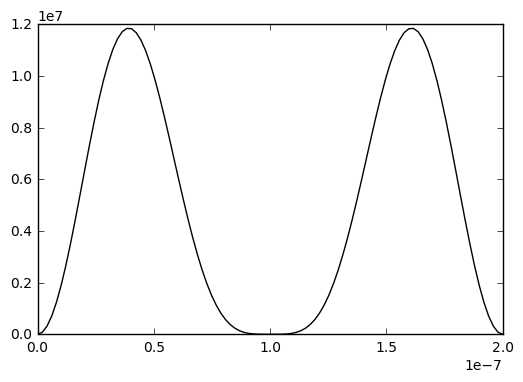

In [88]:
plt.plot(x_knots,Prob0_knots,'k-')
#plt.plot(x_knots,Prob1_knots,'r-')

In [1]:
#convert string to hex
def toHex(s):
    lst = []
    for ch in s:
        hv = hex(ord(ch)).replace('0x', '')
        if len(hv) == 1:
            hv = '0'+hv
        lst.append(hv)
    
    return reduce(lambda x,y:x+y, lst)

In [2]:
toHex('I love my wife and kids')

'49206c6f7665206d79207769666520616e64206b696473'

In [ ]:
32xx